In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# добавление возможности вращать и приближать построенные 3D изображения
%matplotlib notebook

In [2]:
def flower(op):
    
    # массив с основными характеристиками (могут быть изменены)
    gene = [25, 575, 32, op, 8, 3.6, 4, 2, 4, 2]

    '''
    элемент 0 и элемент 1: детализация (сетка);
    элемент 2: количество лепестков;
    элементы 3-9: форма
    '''

    # последовательность действий
    y, t = np.meshgrid(np.linspace(0,1,gene[0]), np.linspace(0,1,gene[1])*gene[2]*np.pi/2)
    p = (np.pi/gene[3])*np.exp(-t/(gene[4]*np.pi))
    u = 1-(1-np.mod(gene[5]*t/np.pi,2))**gene[6]/gene[7]
    x = gene[8]*(y*(y-1))**gene[9]*np.sin(p)

    # преобразование поворота
    r = u*(x*np.cos(p)+y*np.sin(p))
    z = u*(-x*np.sin(p)+y*np.cos(p))

    x = r*np.sin(t)
    y = r*np.cos(t)
    
    return (x,y,z)

<IPython.core.display.Javascript object>


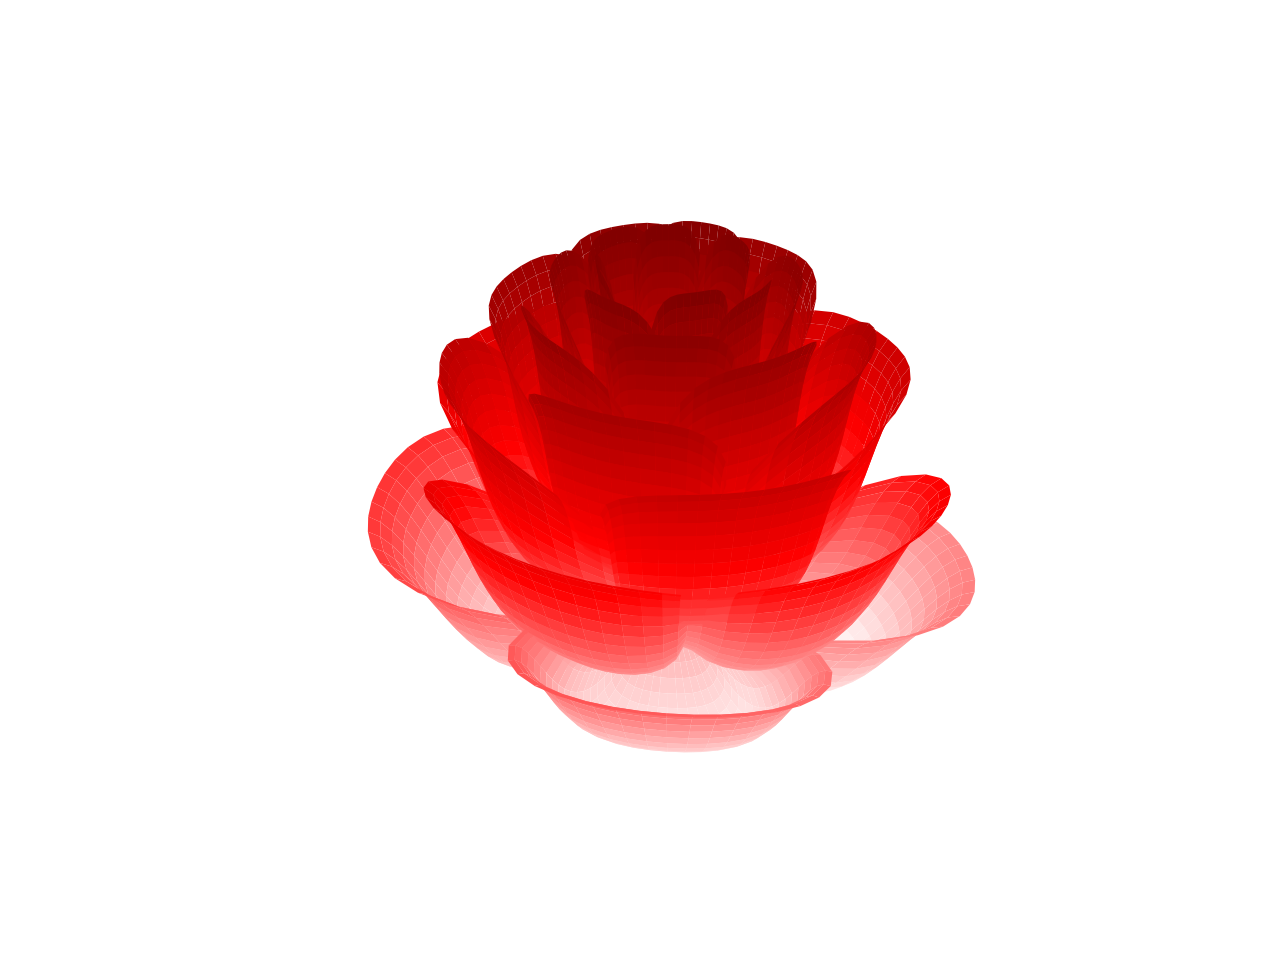

In [3]:
# готовой colormap ('seismic') от синего через белый к красному
colormap = cm.get_cmap('seismic',256)

# выделяю верхнюю часть интервала (от белого к красному)
colormap_shear = colormap(np.linspace(0.5,1,256))

# на основе выделенного интервала генерирую новый colormap
new_colormap = colors.ListedColormap(colormap_shear)

# строю 3D фигуру (оси)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.dist = 7

# скрываю оси
ax.set_axis_off()

# строю изображение по координатам
(x,y,z) = flower(2)
surf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap=new_colormap,antialiased=True)
plt.show()

In [4]:
import plotly.graph_objects as go
from ipywidgets import interactive, VBox

fig = go.FigureWidget(data = go.Surface(x=x, y=y, z=z, colorscale='reds'))
fig.update_traces(showscale=False)

def update(op):
    new_coordinates = flower(op)
    fig.data[0].x = new_coordinates[0]
    fig.data[0].y = new_coordinates[1]
    fig.data[0].z = new_coordinates[2]
    
op_slider = interactive(update, op=(2,7,0.1))
vb = VBox((fig, op_slider))
vb.layout.align_items = 'center'

vb

    'data': [{'colorscale': [[0.0, 'rgb(255,245,240)'], [0.125,
                …